In [79]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
from keras.models import load_model
from keras.models import Sequential
import math

In [80]:
# -------------------------------------------------
# Constant
SIZE_FILTER_X = 36
SIZE_FILTER_Y = 36
NB_ITERATION = 20

In [81]:
def load_model_keras(path_to_model):
    return load_model(path_to_model)

In [82]:
def compute_mean_rectangle(list_point, step_x, step_y):
    has_changed = True
    while(has_changed):
        has_changed = False
        temp_result = []
        list_indice = []
        for i in range(len(list_point)):
            Added_new_element = False
            for j in range(i+1, len(list_point)):
                if (math.fabs(list_point[i][0] - list_point[j][0]) <= 3*step_x and
                    math.fabs(list_point[i][1] - list_point[j][1]) <= 3*step_y and j not in list_indice):
                    
                    temp_result.append((int((list_point[i][0] + list_point[j][0])/2), int((list_point[i][1] + list_point[j][1])/2)))
                    list_indice.append(j)
                    Added_new_element = True
                    
            if Added_new_element == False and i not in list_indice:
                temp_result.append(list_point[i])
                
            has_changed = has_changed | Added_new_element
            
        list_point = copy.deepcopy(temp_result)
    
    return list_point
        

In [83]:
def search_visage(gray_image, size_filter_X, size_filter_Y, model):
    
    # Raise an exception, if we can't apply the fitlter
    width, height = gray_image.shape[0], gray_image.shape[1]
    
    if width < size_filter_Y and height < size_filter_X :
        raise Exception ("impossible to crop properly")
        
    if (size_filter_X/2) % 2 != 0 or (size_filter_Y/2) % 2 != 0:
        raise Exception ("All dimension of the filter should be pair")
    
    # loop on the image.
    fil_divi_2_X = int (size_filter_X/2)
    fil_divi_2_Y = int (size_filter_Y/2)
    step_x = int(fil_divi_2_X/3)
    step_y = int(fil_divi_2_Y/3)
    result = []
    listImgPos = []
    for y in range(fil_divi_2_X, height - fil_divi_2_X, step_x):
        for x in range(fil_divi_2_Y, width - fil_divi_2_Y, step_y):
            crop_img = gray_image[y - fil_divi_2_Y: y + fil_divi_2_Y, x - fil_divi_2_X : x + fil_divi_2_X]
            
            crop_imag_copy  = copy.deepcopy(crop_img)
            
            crop_img = np.array(crop_img)
            crop_img.resize((1,36,36,1))
            
            if int(model.predict(crop_img,verbose = 0)[0] + 0.5) == 1:
                print ("GET A VISAGE")
                result.append((x,y))
                listImgPos.append(crop_imag_copy)
    return compute_mean_rectangle(result, step_x, step_y), listImgPos

In [84]:
def draw_rectangle(img, cor_x, cor_y, size_filter_X, size_filter_Y ):
    print("ADD RECTANGLE")
    fil_divi_2_X = int (size_filter_X/2)
    fil_divi_2_Y = int (size_filter_Y/2)
    cv2.rectangle(img, (cor_x - fil_divi_2_X, cor_y - fil_divi_2_Y), (cor_x + fil_divi_2_X, cor_y + fil_divi_2_Y), (255,0,0), 2)
    return img

In [85]:
def pyramid_search (path_image, size_filter_X, size_filter_Y, nb_iterations, model):
    # We get and tranform the image in gray.
    img_search = cv2.imread(path_image)
    gray_image = cv2.cvtColor(img_search, cv2.COLOR_BGR2GRAY)
    gray_imag_rect  = copy.deepcopy(gray_image)
    
    # Make the reduction.
    # --> search
    height, width = gray_image.shape
    nbPixelToReduceX = int(int(width  - size_filter_X) / (nb_iterations-1))
    nbPixelToReduceY = int(int(height - size_filter_Y) / (nb_iterations-1))
    
    
    for ite in range(nb_iterations) :
        
        height, width = gray_image.shape
        
        if(ite == nb_iterations-1):
            gray_image = cv2.resize(gray_image, (size_filter_X, size_filter_Y)) # Last iteration
            size_filter_X_new = width - nbPixelToReduceX
            size_filter_Y_new = height - nbPixelToReduceY
            height, width = gray_image.shape
        elif(ite == 0):
            size_filter_X_new = size_filter_X - nbPixelToReduceX
            size_filter_Y_new = size_filter_Y - nbPixelToReduceY
        else :
            gray_image = cv2.resize(gray_image, (width - nbPixelToReduceX, height - nbPixelToReduceY))   
        
        gray_imag_rect_copy  = copy.deepcopy(gray_image)
            
        # we get all square that seems to be a visage.
        result, listImgPos = search_visage(gray_image, size_filter_X, size_filter_Y, model)
        
        size_filter_X_new = nbPixelToReduceX + size_filter_X_new
        size_filter_Y_new = nbPixelToReduceY + size_filter_Y_new
        
        
        # draw red rectangle.
        for x, y in result: 
            gray_imag_rect = draw_rectangle(gray_image, x, y, size_filter_X, size_filter_Y)
        
        
        ## Display positives images
        #for l in listImgPos :
        #    plt.figure()
        #    plt.imshow(l)
            
        ## Display initial image with reds rectangles. 
        if(result == []) :
            plt.figure()
            plt.imshow(gray_image)
        else :
            plt.figure()
            plt.imshow(gray_imag_rect)
        
        # Remove rectangle before next iteration.
        gray_image = gray_imag_rect_copy       
        
    return gray_imag_rect

GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE

GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
G

GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
ADD RECTANGLE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE
GET A VISAGE


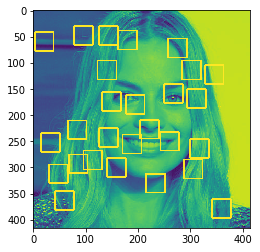

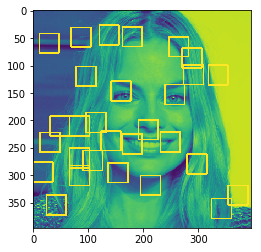

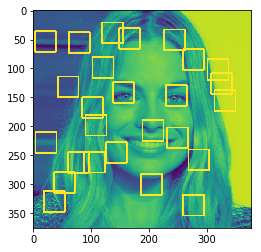

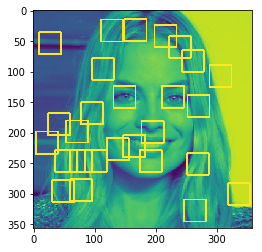

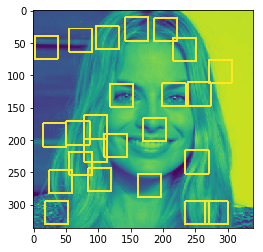

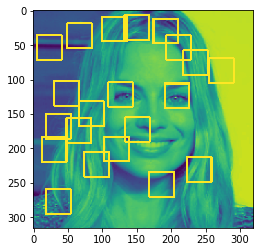

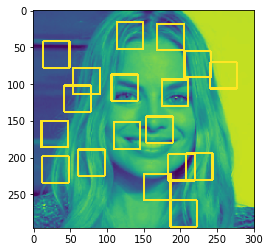

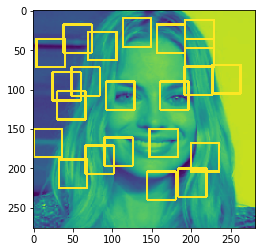

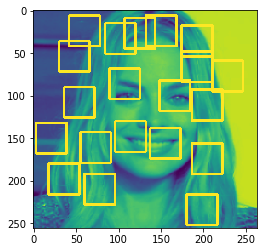

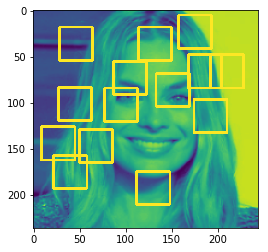

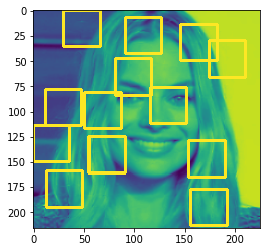

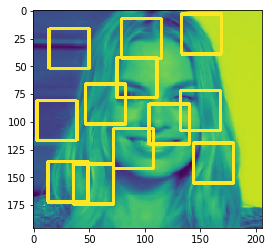

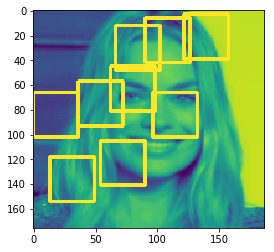

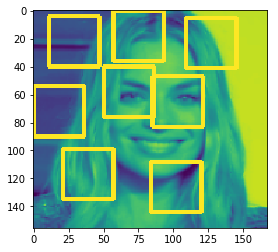

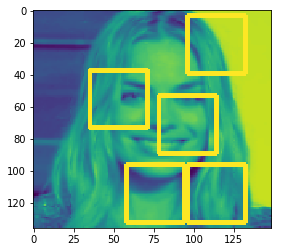

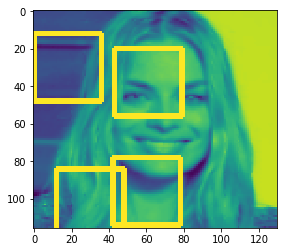

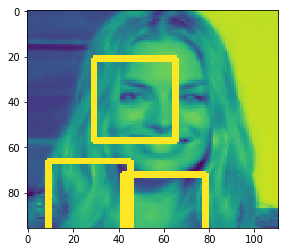

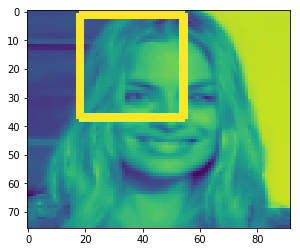

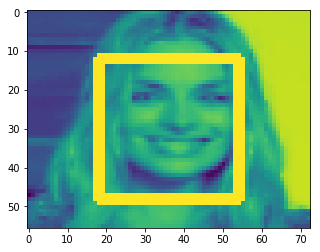

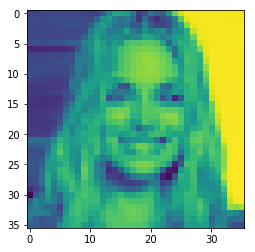

In [86]:
model = load_model_keras('my_model.h5')
result = pyramid_search('hulk.jpg', SIZE_FILTER_X, SIZE_FILTER_Y, NB_ITERATION, model)

<h1>HARD Example</h1>

In [87]:
def pyramid_search_difficult (path_image, size_filter_X, size_filter_Y, nb_iterations, model, threshold):
    # We get and tranform the image in gray.
    img_search = cv2.imread(path_image)
    gray_image = cv2.cvtColor(img_search, cv2.COLOR_BGR2GRAY)
    gray_imag_rect  = copy.deepcopy(gray_image)
    
    # Make the reduction.
    # --> search
    height, width = gray_image.shape
    nbPixelToReduceX = int((width  - size_filter_X) / nb_iterations)
    nbPixelToReduceY = int((height - size_filter_Y) / nb_iterations)
    
    list_reponse = []
    for ite in range(nb_iterations) :
        
        height, width = gray_image.shape
        
        if(ite == nb_iterations-1):
            gray_image = cv2.resize(gray_image, (size_filter_X, size_filter_Y)) # Last iteration
            size_filter_X_new = width - nbPixelToReduceX
            size_filter_Y_new = height - nbPixelToReduceY
            height, width = gray_image.shape
        elif(ite == 0):
            size_filter_X_new = size_filter_X - nbPixelToReduceX
            size_filter_Y_new = size_filter_Y - nbPixelToReduceY
        else :
            gray_image = cv2.resize(gray_image, (width - nbPixelToReduceX, height - nbPixelToReduceY))   
        
        gray_imag_rect_copy  = copy.deepcopy(gray_image)
        
        # we get a list of all visage.
        list_reponse = list_reponse + search_visage(gray_image, size_filter_X, size_filter_Y, model, threshold)
        
    return list_reponse

In [88]:
def search_visage(gray_image, size_filter_X, size_filter_Y, model, threshold):
    
    # Raise an exception, if we can't apply the fitlter
    width, height = gray_image.shape[0], gray_image.shape[1]
    
    if width < size_filter_Y and height < size_filter_X :
        raise Exception ("impossible to crop properly")
        
    if (size_filter_X/2) % 2 != 0 or (size_filter_Y/2) % 2 != 0:
        raise Exception ("All dimension of the filter should be pair")
    
    # loop on the image.
    fil_divi_2_X = int (size_filter_X/2)
    fil_divi_2_Y = int (size_filter_Y/2)
    step_x = int(fil_divi_2_X/3)
    step_y = int(fil_divi_2_Y/3)
    listImgPos = []
    for y in range(fil_divi_2_X, height - fil_divi_2_X, step_x):
        for x in range(fil_divi_2_Y, width - fil_divi_2_Y, step_y):
            crop_img = gray_image[y - fil_divi_2_Y: y + fil_divi_2_Y, x - fil_divi_2_X : x + fil_divi_2_X]
            
            crop_imag_copy  = copy.deepcopy(crop_img)
            crop_img = np.array(crop_img)
            crop_img.resize((1,36,36,1))
            
            if int(model.predict(crop_img,verbose = 0)[0] + threshold) == 1:
                listImgPos.append(crop_imag_copy)

    return listImgPos

In [89]:
model = load_model_keras('my_model.h5')
path_repo = "data_difficult_faces/"
path_save = "data_save_difficult_no_faces/"
def find_and_save_difficult_images(path_repo, path_save, threshold, model):
    list_image = []
    # get the image.
    for index, filename in enumerate(os.listdir(directory)):
        list_difficult_faces =  pyramid_search_difficult(os.path.join(directory, filename), SIZE_FILTER_X, SIZE_FILTER_Y, NB_ITERATION, model, threshold)
        print("Traite l'image : "+ str(index) + " find : "+ str(len (list_difficult_faces)))
        list_image +=  list_difficult_faces
    
    for index, image in enumerate(list_image):
        print(os.path.join(path_save, str(index) + ".jpg"))
        cv2.imwrite(os.path.join(path_save, str(index) + ".jpg"), image)  

In [90]:
find_and_save_difficult_images(path_repo,path_save,  0.2, model)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:11111: error: (-215) scn == 3 || scn == 4 in function cvtColor
